# Project Report 1: Position of a Moving Cart in a Catenary Cable
## Author: Sophie Chun
### Date: Feb 10, 2020
### Other group members: None
<div style="text-align: justify"> <br> The objective of this project is to model a position of a cart that moves along a catenary-shaped cable and to find the cart's position when it comes to rest.

### Problem Analysis 
#### Physical Considerations
<div style="text-align: justify"> Catenary is the curve of a hanging chain or cable that is supported only at its ends and sagged between two ends under the force of gravity (or weight). A cart, moving along a direction of the catenary cable, must therefore exist between two ends of the cable. The cart starts to move from the left-top of the cable and reach the lowest point of the chain since the gravitational force and its applied force from engine are greater than any frictional force (or resistive force). Once the cart reaches the bottom and starts to elevate along the cable, the cart's final position depends on several factors. It mainly depends on the cart's applied force, the frictional force due to the gravitational force, and the catenary parameter that decides the curvature of the cable. In this problem, the horizontal component of the applied force from the cart's engine has a constant magnitude and tangent to the cable with a positive direction. To avoid excessive exception checks, the problem is simplified with an assumption that the weight of the cable is negligible compared to the weight being supported. Another physical assumption is that the frictional force between the cart and the cable is solely due to the cart's gravitational force. When the cart is at rest, it is also assumed that the sum of the forces is zero even though the cart could move in a constant velocity. In this model, the downward and leftward directions are considered to be negative while the upward and rightward directions are considered to be positive. </div>

#### Coding considerations
<div style="text-align: justify">The model of the catenary cable-cart system is a static model to find the final position of the cart when it comes to rest. It is a deterministic model, since the cart's position is completely determined by its applied force, frictional force, and the shape of cable. The variable of interest, the final position, is a continuous variable. To initialize the probelm, the catenary curvature parameter and an x-coordinate of the cable's top with respect to its bottommost part where x-coordinate is 0 are specified first. Then, mass of the cart, gravity of the Earth, the tolerance for finding the final position is specified in order to apply Newton-Raphson algorithm. The number of iterations is counted, and if the change between two solutions is greater than 100, the algorithm is considered to be divergent and terminated.

### Model Development<br>
<div style="text-align: justify">Newton's second law of motion is accounted in order to compute and compare the forces acting on the moving cart. The net force is set to zero, which is the necessary condition for finding the cart's final position when it comes to rest. Considering all the forces when the cart is at its final position and no longer moves, the following equation is derived:

$$\sum{F_{x}}= F_{a} + F_{f} = F_{a} + mg\sin{\theta} = 0$$

<div style="text-align: justify"> <br>
where $F_a$ is the maximum force that the cart can apply, $F_f$ is a frictional force between the moving cart and the cable. Since $F_f$ depends on the horizontal component that is in parallel to the tangential line of the cable, it can be written as $mg\sin{\theta}$. Other forces, a normal force, $F_N$, and the vertical component of the gravitational force, $mg\cos{\theta}$ cancel out each other so discarded. Now, the catenary cable in Cartesian coordinates is modeled as following:

$$y = \alpha\cosh({\frac{x}{\alpha})}$$
<div style="text-align: justify"> <br>where $\alpha$ is a parameter that decides the scaling of the curve. The frictional force from the net force equation is determined by the angle between the tangential line of the cart's position on the curve and x-axis. Thus, the angle is calculated using derivative of $y$ and substituted back to the net force equation above:

$$\theta = \arctan(\frac{dy}{dx})=\arctan(\sinh({\frac{x}{\alpha})})$$

$$\sum{F_{x}}= F_{a} + mg\sin({\arctan(\sinh({\frac{x}{\alpha})}}) = 0$$

<div style="text-align: justify"> <br> The x-coordinate of the final position of the cart is calculated using this equation, based on the assumption that the initial position of the cart is the bottommost of the cable. This equation will be solved using the Newton-Raphson algorithm for root finding. 

### Model Implementation

<div style="text-align: justify"> <br> Model implementation involves several steps to minimize the errors: initialzing the parameters, checking for initial exceptions, introducing the tolerance and maximum number of iterations in the Newton-Raphson loop to ensure that the code does not run forever if the results diverge, and code with verification steps.

#### Initialization of Parameters

In [1]:
import numpy as np # importing the numpy module

m = 50             # mass of the cart (kg)
x_cable = 125      # x-coordinate of the top of the cable, where x-coordinate of the lowest part of the cable is 0 (m)
g = -9.81          # value of gravity on the Earth (ms^-2)
F_a = 250          # maximum force that the car's engine can apply (N)
x_f = 0            # guess of the final position of the cart when it is at rest (m)
alpha = 100        # the catenary parameter
Tolerance = 1e-10  # tolerance for change before termination (m)
MaxIter = 50       # maximum number of iterations of the loop

#### Initial Exception Check

In [2]:
ErrVal = 0 # to keep track of whether any error is encountered or not, initial value 

# The initial parameter except for the gravity should be positive.
if m <= 0 :
    print("m value is invalid. Mass of the cart must be a positive value.")
    ErrVal = 1;
elif x_cable <= 0:
    print("x_cable value is invalid. The maximum horizontal length of the cable should be a positive value.")
    ErrVal = 1;
elif F_a <= 0:
    print("F_a value is invalid. The applied force should be a positive value.")
    ErrVal = 1;
elif alpha <= 0:
    print("alpha value is invalid. The catenary parameter should be a positive value.")
    ErrVal = 1;
elif Tolerance <= 0:
    print("Tolerance value is invalid. Tolerance should be a positive value.")
    ErrVal = 1;
elif MaxIter <= 0:
    print("MaxIter values is invalid. Maximum number of iterations should be a positive value.")
    ErrVal = 1;
# The gravity should be negative.
elif g >= 0:
    print("gravity value is invalid. The value of gravity should be negative since it points downward.")
    ErrVal = 1;
else:
    ErrVal = 0;

#### Main Newton-Raphson Loop for Finding a Solution

In [3]:
if (ErrVal == 0):      # only try to find a solution of no errors during initialization
    # parameters
    x = x_f            # initial guess
    dx = 1.0           # fake "last change in x"
    n = 0              # number of iterations performed so far

    while(np.abs(dx) > Tolerance): # check for convergence based on the change
        # List of Functions
        y = alpha * np.cosh(x/alpha)          # original function y
        y_d = np.sinh(x/alpha)                # derivative of y
        theta = np.arctan(y_d)                # functions to find theta
        # Newton-Raphson Algorithm
        F = F_a + m * g * np.sin(theta)                                       # Newton-Raphson numerator
        G = (g*m*np.cosh(x/alpha)) / (alpha*(np.sinh(x/alpha)**2+1)**(3/2))   # Newton-Raphson denominator
        dx = -F/G                                                             # Newton-Raphson change in x
        
        # Printing Results and Updating Variables
        n = n + 1      # number of iterations
        x = x + dx     # change in x_f, closer to the root value
        
        # Termination if divergence occurs
        if (( n > MaxIter ) or ( np.abs(dx) > 100 )):
            print('ERROR: Maximum number of iterations reached, and no convergence detected. Exiting.')
            ErrVal = 1
            break
        elif (np.sinh(x/alpha)) > (np.sinh(x_cable/alpha)):
            print("The cart reaches the top of the catenary cable. The final position of the cart is undetermined.")
            ErrVal = 1
            break
        else:
            print("Iteration #", n, ": current values are (x, dx) = (", x,', ', dx, ').', sep="")

# Termination and output of results. 
if ErrVal == 1:
    print("Stationary position of the cart couldn't be found because of a previous error in initialization step.")
else:
    print("\nThe cart will settle at ", x, ".", sep="")

Iteration #1: current values are (x, dx) = (50.9683995922528, 50.9683995922528).
Iteration #2: current values are (x, dx) = (56.098746776150655, 5.130347183897856).
Iteration #3: current values are (x, dx) = (56.230189183123166, 0.13144240697250972).
Iteration #4: current values are (x, dx) = (56.23027720806239, 8.802493922453136e-05).
Iteration #5: current values are (x, dx) = (56.23027720810188, 3.9492100527367495e-11).

The cart will settle at 56.23027720810188.


### Model Verification
#### Graphical Verification
<div style="text-align: justify">Displaying a function as a graph is helpful when finding or approximating the root(s). Below, a graph of the net force equation and a line of $y = 0$ is displayed with the root found from Newton-Raphson Algorithm.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)
x_axis = np.linspace(-100, 100, 1000)
y_axis = F_a + m * g * np.sin(np.arctan(np.sinh(x_axis/alpha)))
y_axis2 = np.zeros(1000)
plt.plot(x_axis, y_axis, label="Net Force Function")
plt.plot(x_axis, y_axis2, label="y = 0")
plt.scatter(x, 0, s=100, color='red', label="Newton-Raphson Result")
plt.title("Net Force vs. Car's position")
plt.xlabel("Position")
plt.ylabel("Net Force")
plt.xlim(30,70)
plt.ylim(-100, 100)
plt.grid()
plt.legend()
plt.show()

<Figure size 720x576 with 1 Axes>

<div style="text-align: justify">The intersection of two graphs represents the root of the net force equation, and it corresponds to the result from Newton-Raphson algorithm. Below, an additional verification is done with other initial parameters. Similarly, an intersection of two graphs corresponds to the result from Newton-Raphson algorithm.

In [5]:
# Second graphical verification
m = 100            # mass of the cart (kg)
x_cable = 50       # x-coordinate of the top of the cable, where x-coordinate of the lowest part of the cable is 0 (m)
g = -9.81          # value of gravity on the Earth (ms^-2)
F_a = 150          # maximum force that the car's engine can apply (N)
x_f = 7            # guess of the final position of the cart when it is at rest (m)
alpha = 30         # the catenary parameter
Tolerance = 1e-10  # tolerance for change before termination (m)
MaxIter = 50       # maximum number of iterations of the loop

ErrVal = 0 # to keep track of whether any error is encountered or not, initial value 
# The initial parameter except for the gravity should be positive.
if m <= 0 :
    print("m value is invalid. Mass of the cart must be a positive value.")
    ErrVal = 1;
elif x_cable <= 0:
    print("x_cable value is invalid. The maximum horizontal length of the cable should be a positive value.")
    ErrVal = 1;
elif F_a <= 0:
    print("F_a value is invalid. The applied force should be a positive value.")
    ErrVal = 1;
elif alpha <= 0:
    print("alpha value is invalid. The catenary parameter should be a positive value.")
    ErrVal = 1;
elif Tolerance <= 0:
    print("Tolerance value is invalid. Tolerance should be a positive value.")
    ErrVal = 1;
elif MaxIter <= 0:
    print("MaxIter values is invalid. Maximum number of iterations should be a positive value.")
    ErrVal = 1;
# The gravity should be negative.
elif g >= 0:
    print("gravity value is invalid. The value of gravity should be negative since it points downward.")
    ErrVal = 1;
else:
    ErrVal = 0;

if (ErrVal == 0):      # only try to find a solution of no errors during initialization
    # parameters
    x = x_f            # initial guess
    dx = 1.0           # fake "last change in x"
    n = 0              # number of iterations performed so far

    while(np.abs(dx) > Tolerance): # check for convergence based on the change
        # List of Functions
        y = alpha * np.cosh(x/alpha)          # original function y
        y_d = np.sinh(x/alpha)                # derivative of y
        theta = np.arctan(y_d)                # functions to find theta
        
        # Newton-Raphson Algorithm
        F = F_a + m * g * np.sin(theta)                                       # Newton-Raphson numerator
        G = (g*m*np.cosh(x/alpha)) / (alpha*(np.sinh(x/alpha)**2+1)**(3/2))   # Newton-Raphson denominator
        dx = -F/G                                                             # Newton-Raphson change in x
        
        # Printing Results and Updating Variables
        n = n + 1      # number of iterations
        x = x + dx     # change in x_f, closer to the root value
        
        # Termination if divergence occurs
        if (( n > MaxIter ) or ( np.abs(dx) > 100 )):
            print('ERROR: Maximum number of iterations reached, and no convergence detected. Exiting.')
            ErrVal = 1
            break
        elif (np.sinh(x/alpha)) > (np.sinh(x_cable/alpha)):
            print("The cart reaches the top of the catenary cable. The final position of the cart is undetermined.")
            ErrVal = 1
            break
        else:
            print("Iteration #", n, ": current values are (x, dx) = (", x,', ', dx, ').', sep="")

# Termination and output of results. 
if ErrVal == 1:
    print("Stationary position of the cart couldn't be found because of a previous error in initialization step.")
else:
    print("\nThe cart will settle at ", x, ".", sep="")

Iteration #1: current values are (x, dx) = (4.584611516483916, -2.4153884835160846).
Iteration #2: current values are (x, dx) = (4.623407587734484, 0.038796071250567804).
Iteration #3: current values are (x, dx) = (4.623415218909787, 7.631175303645886e-06).
Iteration #4: current values are (x, dx) = (4.6234152189100834, 2.963610071518556e-13).

The cart will settle at 4.6234152189100834.


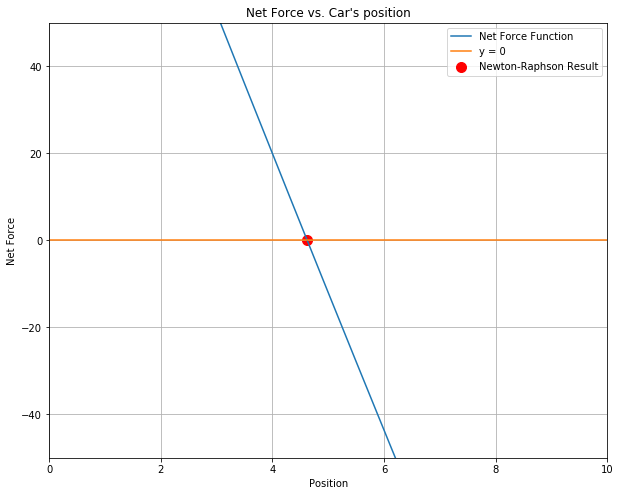

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)
x_axis = np.linspace(-100, 100, 1000)
y_axis = F_a + m * g * np.sin(np.arctan(np.sinh(x_axis/alpha)))
y_axis2 = np.zeros(1000)
plt.plot(x_axis, y_axis, label="Net Force Function")
plt.plot(x_axis, y_axis2, label="y = 0")
plt.scatter(x, 0, s=100, color='red', label="Newton-Raphson Result")
plt.title("Net Force vs. Car's position")
plt.xlabel("Position")
plt.ylabel("Net Force")
plt.xlim(0,10)
plt.ylim(-50,50)
plt.grid()
plt.legend()
plt.show()

#### Numerical Verification

**1. When any parameter has invalid value**
<div style="text-align: justify"> This is an error in the initialization step. Thus, it should produce an error message and warn that the initialization step must be revised. Below, the mass of the cart has negative value, and the code has an error.

In [7]:
m = -100            # mass of the cart (kg)
x_cable = 50       # x-coordinate of the top of the cable, where x-coordinate of the lowest part of the cable is 0 (m)
g = -9.81          # value of gravity on the Earth (ms^-2)
F_a = 150          # maximum force that the car's engine can apply (N)
x_f = 0            # guess of the final position of the cart when it is at rest (m)
alpha = 30         # the catenary parameter
Tolerance = 1e-10  # tolerance for change before termination (m)
MaxIter = 50       # maximum number of iterations of the loop

ErrVal = 0 # to keep track of whether any error is encountered or not, initial value 
# The initial parameter except for the gravity should be positive.
if m <= 0 :
    print("m value is invalid. Mass of the cart must be a positive value. Revise parameter.")
    ErrVal = 1;
elif x_cable <= 0:
    print("x_cable value is invalid. The maximum horizontal length of the cable should be a positive value. Revise parameter.")
    ErrVal = 1;
elif F_a <= 0:
    print("F_a value is invalid. The applied force should be a positive value. Revise parameter.")
    ErrVal = 1;
elif alpha <= 0:
    print("alpha value is invalid. The catenary parameter should be a positive value. Revise parameter.")
    ErrVal = 1;
elif Tolerance <= 0:
    print("Tolerance value is invalid. Tolerance should be a positive value. Revise parameter.")
    ErrVal = 1;
elif MaxIter <= 0:
    print("MaxIter values is invalid. Maximum number of iterations should be a positive value. Revise parameter.")
    ErrVal = 1;
# The gravity should be negative.
elif g >= 0:
    print("gravity value is invalid. The value of gravity should be negative since it points downward. Revise parameter.")
    ErrVal = 1;
else:
    ErrVal = 0;

# parameters
x = x_f            # initial guess
dx = 1.0           # fake "last change in x"
n = 0              # number of iterations performed so far
if (ErrVal == 0):  # only try to find a solution of no errors during initialization
    
    while(np.abs(dx) > Tolerance): # check for convergence based on the change
        # List of Functions
        y = alpha * np.cosh(x/alpha)          # original function y
        y_d = np.sinh(x/alpha)                # derivative of y
        theta = np.arctan(y_d)                # functions to find theta
        
        # Newton-Raphson Algorithm
        F = F_a + m * g * np.sin(theta)                                       # Newton-Raphson numerator
        G = (g*m*np.cosh(x/alpha)) / (alpha*(np.sinh(x/alpha)**2+1)**(3/2))   # Newton-Raphson denominator
        dx = -F/G                                                             # Newton-Raphson change in x
        
        # Printing Results and Updating Variables
        n = n + 1      # number of iterations
        x = x + dx     # change in x_f, closer to the root value
        
        # Termination if divergence occurs
        if (( n > MaxIter ) or ( np.abs(dx) > 100 )):
            print('ERROR: Maximum number of iterations reached, and no convergence detected. Exiting.')
            ErrVal = 1
            break
        elif (np.sinh(x/alpha)) > (np.sinh(x_cable/alpha)):
            print("The cart reaches the top of the catenary cable. The final position of the cart is undetermined.")
            ErrVal = 1
            break
        else:
            print("Iteration #", n, ": current values are (x, dx) = (", x,', ', dx, ').', sep="")

# Termination and output of results. 
if ErrVal == 1:
    print("Stationary position of the cart couldn't be found because of a previous error in initialization step.")
else:
    print("\nThe cart will settle at ", x, ".", sep="")

m value is invalid. Mass of the cart must be a positive value. Revise parameter.
Stationary position of the cart couldn't be found because of a previous error in initialization step.


**2. When the cart's final position is greater than the maximum horizontal length of the cable** <br>
<div style="text-align: justify"> This leads to an error, because the cart's applied force is too large or the maximum horizontal length of the catenary cable is too small. The final distance of the cart depends on the angle between the tangential line of the cart's position and x-axis. Thus, using this angle, a frictional force and an applied force can be compared. If a frictional force is greater than the applied force, it should produce an error message and terminate.<br>

In [8]:
m = 10            # mass of the cart (kg)
x_cable = 4       # x-coordinate of the top of the cable, where x-coordinate of the lowest part of the cable is 0 (m)
g = -9.81         # value of gravity on the Earth (ms^-2)
F_a = 150         # maximum force that the car's engine can apply (N)
x_f = 7           # guess of the final position of the cart when it is at rest (m)
alpha = 30        # the catenary parameter
Tolerance = 1e-10 # tolerance for change before termination (m)
MaxIter = 50      # maximum number of iterations of the loop

ErrVal = 0 # to keep track of whether any error is encountered or not, initial value 
# The initial parameter except for the gravity should be positive.
if m <= 0 :
    print("m value is invalid. Mass of the cart must be a positive value.")
    ErrVal = 1;
elif x_cable <= 0:
    print("x_cable value is invalid. The maximum horizontal length of the cable should be a positive value.")
    ErrVal = 1;
elif F_a <= 0:
    print("F_a value is invalid. The applied force should be a positive value.")
    ErrVal = 1;
elif alpha <= 0:
    print("alpha value is invalid. The catenary parameter should be a positive value.")
    ErrVal = 1;
elif Tolerance <= 0:
    print("Tolerance value is invalid. Tolerance should be a positive value.")
    ErrVal = 1;
elif MaxIter <= 0:
    print("MaxIter values is invalid. Maximum number of iterations should be a positive value.")
    ErrVal = 1;
# The gravity should be negative.
elif g >= 0:
    print("gravity value is invalid. The value of gravity should be negative since it points downward.")
    ErrVal = 1;
else:
    ErrVal = 0;

# parameters
x = x_f            # initial guess
dx = 1.0           # fake "last change in x"
n = 0              # number of iterations performed so far
if (ErrVal == 0):  # only try to find a solution of no errors during initialization
    
    while(np.abs(dx) > Tolerance): # check for convergence based on the change
        # List of Functions
        y = alpha * np.cosh(x/alpha)          # original function y
        y_d = np.sinh(x/alpha)                # derivative of y
        theta = np.arctan(y_d)                # functions to find theta
        
        # Newton-Raphson Algorithm
        F = F_a + m * g * np.sin(theta)                                       # Newton-Raphson numerator
        G = (g*m*np.cosh(x/alpha)) / (alpha*(np.sinh(x/alpha)**2+1)**(3/2))   # Newton-Raphson denominator
        dx = -F/G                                                             # Newton-Raphson change in x
        
        # Printing Results and Updating Variables
        n = n + 1      # number of iterations
        x = x + dx     # change in x_f, closer to the root value
        
        # Termination if divergence occurs
        if (( n > MaxIter ) or ( np.abs(dx) > 100 )):
            print('ERROR: Maximum number of iterations reached, and no convergence detected. Exiting.')
            ErrVal = 1
            break
        elif (np.sinh(x/alpha)) > (np.sinh(x_cable/alpha)):
            print("The cart reaches the top of the catenary cable. The final position of the cart is undetermined.")
            ErrVal = 1
            break
        else:
            print("Iteration #", n, ": current values are (x, dx) = (", x,', ', dx, ').', sep="")

# Termination and output of results. 
if ErrVal == 1:
    print("Stationary position of the cart couldn't be found because of a previous error in initialization step.")
else:
    print("\nThe cart will settle at ", x, ".", sep="")

The cart reaches the top of the catenary cable. The final position of the cart is undetermined.
Stationary position of the cart couldn't be found because of a previous error in initialization step.


**3. When the initial guess is too far from the root** <br>
<div style="text-align: justify"> The iteration keeps going, and the divergence keeps increasing. Thus, it should be terminated before printing the iterations.

In [9]:
m = 10            # mass of the cart (kg)
x_cable = 4       # x-coordinate of the top of the cable, where x-coordinate of the lowest part of the cable is 0 (m)
g = -9.81         # value of gravity on the Earth (ms^-2)
F_a = 150         # maximum force that the car's engine can apply (N)
x_f = -1000       # guess of the final position of the cart when it is at rest (m)
alpha = 30        # the catenary parameter
Tolerance = 1e-10 # tolerance for change before termination (m)
MaxIter = 50      # maximum number of iterations of the loop

ErrVal = 0 # to keep track of whether any error is encountered or not, initial value 
# The initial parameter except for the gravity should be positive.
if m <= 0 :
    print("m value is invalid. Mass of the cart must be a positive value.")
    ErrVal = 1;
elif x_cable <= 0:
    print("x_cable value is invalid. The maximum horizontal length of the cable should be a positive value.")
    ErrVal = 1;
elif F_a <= 0:
    print("F_a value is invalid. The applied force should be a positive value.")
    ErrVal = 1;
elif alpha <= 0:
    print("alpha value is invalid. The catenary parameter should be a positive value.")
    ErrVal = 1;
elif Tolerance <= 0:
    print("Tolerance value is invalid. Tolerance should be a positive value.")
    ErrVal = 1;
elif MaxIter <= 0:
    print("MaxIter values is invalid. Maximum number of iterations should be a positive value.")
    ErrVal = 1;
# The gravity should be negative.
elif g >= 0:
    print("gravity value is invalid. The value of gravity should be negative since it points downward.")
    ErrVal = 1;
else:
    ErrVal = 0;

# parameters
x = x_f            # initial guess
dx = 1.0           # fake "last change in x"
n = 0              # number of iterations performed so far
if (ErrVal == 0):  # only try to find a solution of no errors during initialization
    
    while(np.abs(dx) > Tolerance): # check for convergence based on the change
        # List of Functions
        y = alpha * np.cosh(x/alpha)          # original function y
        y_d = np.sinh(x/alpha)                # derivative of y
        theta = np.arctan(y_d)                # functions to find theta
        
        # Newton-Raphson Algorithm
        F = F_a + m * g * np.sin(theta)                                       # Newton-Raphson numerator
        G = (g*m*np.cosh(x/alpha)) / (alpha*(np.sinh(x/alpha)**2+1)**(3/2))   # Newton-Raphson denominator
        dx = -F/G                                                             # Newton-Raphson change in x
        
        # Printing Results and Updating Variables
        n = n + 1      # number of iterations
        x = x + dx     # change in x_f, closer to the root value
        
        # Termination if divergence occurs
        if (( n > MaxIter ) or ( np.abs(dx) > 100 )):
            print('ERROR: Maximum number of iterations reached, and no convergence detected. Exiting.')
            ErrVal = 1
            break
        elif (np.sinh(x/alpha)) > (np.sinh(x_cable/alpha)):
            print("The cart reaches the top of the catenary cable. The final position of the cart is undetermined.")
            ErrVal = 1
            break
        else:
            print("Iteration #", n, ": current values are (x, dx) = (", x,', ', dx, ').', sep="")

# Termination and output of results. 
if ErrVal == 1:
    print("Stationary position of the cart couldn't be found because of a previous error in initialization step.")
else:
    print("\nThe cart will settle at ", x, ".", sep="")

ERROR: Maximum number of iterations reached, and no convergence detected. Exiting.
Stationary position of the cart couldn't be found because of a previous error in initialization step.


**4. When the cart's applied force is small vs. large with other parameters being constant** <br>
<div style="text-align: justify"> When the cart's applied force is small, then the cart should have smaller value of its final position. On the other hand, when the cart's applied force is large, then the cart should have greater value of its final position. Two different situations are demonstrated below.

In [10]:
# Smaller Applied Force
m = 100            # mass of the cart (kg)
x_cable = 50       # x-coordinate of the top of the cable, where x-coordinate of the lowest part of the cable is 0 (m)
g = -9.81          # value of gravity on the Earth (ms^-2)
F_a = 300          # maximum force that the car's engine can apply (N)
x_f = 0            # guess of the final position of the cart when it is at rest (m)
alpha = 30         # the catenary parameter
Tolerance = 1e-10  # tolerance for change before termination (m)
MaxIter = 50       # maximum number of iterations of the loop

ErrVal = 0 # to keep track of whether any error is encountered or not, initial value 
# The initial parameter except for the gravity should be positive.
if m <= 0 :
    print("m value is invalid. Mass of the cart must be a positive value.")
    ErrVal = 1;
elif x_cable <= 0:
    print("x_cable value is invalid. The maximum horizontal length of the cable should be a positive value.")
    ErrVal = 1;
elif F_a <= 0:
    print("F_a value is invalid. The applied force should be a positive value.")
    ErrVal = 1;
elif alpha <= 0:
    print("alpha value is invalid. The catenary parameter should be a positive value.")
    ErrVal = 1;
elif Tolerance <= 0:
    print("Tolerance value is invalid. Tolerance should be a positive value.")
    ErrVal = 1;
elif MaxIter <= 0:
    print("MaxIter values is invalid. Maximum number of iterations should be a positive value.")
    ErrVal = 1;
# The gravity should be negative.
elif g >= 0:
    print("gravity value is invalid. The value of gravity should be negative since it points downward.")
    ErrVal = 1;
else:
    ErrVal = 0;

# parameters
x = x_f            # initial guess
dx = 1.0           # fake "last change in x"
n = 0              # number of iterations performed so far
if (ErrVal == 0):  # only try to find a solution of no errors during initialization
    
    while(np.abs(dx) > Tolerance): # check for convergence based on the change
        # List of Functions
        y = alpha * np.cosh(x/alpha)          # original function y
        y_d = np.sinh(x/alpha)                # derivative of y
        theta = np.arctan(y_d)                # functions to find theta
        
        # Newton-Raphson Algorithm
        F = F_a + m * g * np.sin(theta)                                       # Newton-Raphson numerator
        G = (g*m*np.cosh(x/alpha)) / (alpha*(np.sinh(x/alpha)**2+1)**(3/2))   # Newton-Raphson denominator
        dx = -F/G                                                             # Newton-Raphson change in x
        
        # Printing Results and Updating Variables
        n = n + 1      # number of iterations
        x = x + dx     # change in x_f, closer to the root value
        
        # Termination if divergence occurs
        if (( n > MaxIter ) or ( np.abs(dx) > 100 )):
            print('ERROR: Maximum number of iterations reached, and no convergence detected. Exiting.')
            ErrVal = 1
            break
        elif (np.sinh(x/alpha)) > (np.sinh(x_cable/alpha)):
            print("The cart reaches the top of the catenary cable. The final position of the cart is undetermined.")
            ErrVal = 1
            break
        else:
            print("Iteration #", n, ": current values are (x, dx) = (", x,', ', dx, ').', sep="")

# Termination and output of results. 
if ErrVal == 1:
    print("Stationary position of the cart couldn't be found because of a previous error in initialization step.")
else:
    print("\nThe cart will settle at ", x, ".", sep="")

Iteration #1: current values are (x, dx) = (9.174311926605505, 9.174311926605505).
Iteration #2: current values are (x, dx) = (9.476593456030095, 0.3022815294245904).
Iteration #3: current values are (x, dx) = (9.477509927646862, 0.0009164716167665699).
Iteration #4: current values are (x, dx) = (9.477509936208328, 8.561465451735413e-09).
Iteration #5: current values are (x, dx) = (9.477509936208328, 0.0).

The cart will settle at 9.477509936208328.


In [11]:
#Greater Applied Force
m = 100            # mass of the cart (kg)
x_cable = 50       # x-coordinate of the top of the cable, where x-coordinate of the lowest part of the cable is 0 (m)
g = -9.81          # value of gravity on the Earth (ms^-2)
F_a = 500          # maximum force that the car's engine can apply (N)
x_f = 0            # guess of the final position of the cart when it is at rest (m)
alpha = 30         # the catenary parameter
Tolerance = 1e-10  # tolerance for change before termination (m)
MaxIter = 50       # maximum number of iterations of the loop

ErrVal = 0 # to keep track of whether any error is encountered or not, initial value 
# The initial parameter except for the gravity should be positive.
if m <= 0 :
    print("m value is invalid. Mass of the cart must be a positive value.")
    ErrVal = 1;
elif x_cable <= 0:
    print("x_cable value is invalid. The maximum horizontal length of the cable should be a positive value.")
    ErrVal = 1;
elif F_a <= 0:
    print("F_a value is invalid. The applied force should be a positive value.")
    ErrVal = 1;
elif alpha <= 0:
    print("alpha value is invalid. The catenary parameter should be a positive value.")
    ErrVal = 1;
elif Tolerance <= 0:
    print("Tolerance value is invalid. Tolerance should be a positive value.")
    ErrVal = 1;
elif MaxIter <= 0:
    print("MaxIter values is invalid. Maximum number of iterations should be a positive value.")
    ErrVal = 1;
# The gravity should be negative.
elif g >= 0:
    print("gravity value is invalid. The value of gravity should be negative since it points downward.")
    ErrVal = 1;
else:
    ErrVal = 0;

# parameters
x = x_f            # initial guess
dx = 1.0           # fake "last change in x"
n = 0              # number of iterations performed so far
if (ErrVal == 0):  # only try to find a solution of no errors during initialization
    
    while(np.abs(dx) > Tolerance): # check for convergence based on the change
        # List of Functions
        y = alpha * np.cosh(x/alpha)          # original function y
        y_d = np.sinh(x/alpha)                # derivative of y
        theta = np.arctan(y_d)                # functions to find theta
        
        # Newton-Raphson Algorithm
        F = F_a + m * g * np.sin(theta)                                       # Newton-Raphson numerator
        G = (g*m*np.cosh(x/alpha)) / (alpha*(np.sinh(x/alpha)**2+1)**(3/2))   # Newton-Raphson denominator
        dx = -F/G                                                             # Newton-Raphson change in x
        
        # Printing Results and Updating Variables
        n = n + 1      # number of iterations
        x = x + dx     # change in x_f, closer to the root value
        
        # Termination if divergence occurs
        if (( n > MaxIter ) or ( np.abs(dx) > 100 )):
            print('ERROR: Maximum number of iterations reached, and no convergence detected. Exiting.')
            ErrVal = 1
            break
        elif (np.sinh(x/alpha)) > (np.sinh(x_cable/alpha)):
            print("The cart reaches the top of the catenary cable. The final position of the cart is undetermined.")
            ErrVal = 1
            break
        else:
            print("Iteration #", n, ": current values are (x, dx) = (", x,', ', dx, ').', sep="")

# Termination and output of results. 
if ErrVal == 1:
    print("Stationary position of the cart couldn't be found because of a previous error in initialization step.")
else:
    print("\nThe cart will settle at ", x, ".", sep="")

Iteration #1: current values are (x, dx) = (15.29051987767584, 15.29051987767584).
Iteration #2: current values are (x, dx) = (16.829624032845196, 1.5391041551693567).
Iteration #3: current values are (x, dx) = (16.86905675493695, 0.039432722091752914).
Iteration #4: current values are (x, dx) = (16.869083162418715, 2.640748176735941e-05).
Iteration #5: current values are (x, dx) = (16.869083162430563, 1.184763015821025e-11).

The cart will settle at 16.869083162430563.


### Discussion <br>
<div style = "text-align: justify"> Solution for the final position of the moving cart was implemented. The program, based on the Newton-Raphson algorithm, finds the solution. Excpetions for the parameters and the position values were encoded. Considering the moving cart starting from the lowest part of the cable to upward direction along the catenary cable, the cart's mass, maximum applied force by engine, gravity value, and catenary parameter are introduced. In order to prevent the infinite loop or divergence of the solutions, the program terminates when an initial guess of the solution is way far from the actual solution or the divergence between two solutions is greater than a certain number, 100 in this case. The program output has been verified in two ways: graphical verification and numerical verification. Two situations with different parameters are graphed, and both of their roots and solutions from Newton-Raphson algorithm correspond to each other. Additionally, four numerical verifications are introduced, and it is demonstrated that the program covers the errors caused by each case.